# Student alcohol consumption EDA
- Some exploratory data analysis to find out if socio-economic, bad choises and other factors influence school grades from this gold [kaggle-data-set](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

i want to find the answer to these questions:
1. Does weekday drinking hurt grades more than weekend drinking?
2. Do students with lower_edu parents do worse or better at school?
3. Do students that have a romantic relationship do worse at school?
4. Does student school absence equal worse grades?
5. Does family size influence school grades and alchohol consumption?
6. Do gifted kids (low study hours high grades) do better at school than hard working students (high study hours, high grades) 

---
Lets start with importing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (6, 4)


We have 2 datasets math grades and portugees grades. I chose the dataset of Math grades because math is harder to get a good score on without learning compared to languague course

In [3]:
df = pd.read_csv('data/archive/student-mat.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

All data is non-null and is there and shape is (395,33)

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.iloc[0]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
Name: 0, dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Here we can read relevant data to our questions for comparing grades we can mean of 'G1', 'G2', 'G3':
##### 1. Do students that travel longer to school do better at school and consume less alchohol?
Lets compare 'traveltime' (1-4) with alchohol consumption. lets mean the alchohol consumption into one column to compare the two (1-5).
##### 2. Do students with lower_edu/poorer parents do worse at school?
To answer question two lets make a scale in a seperate row of how rich/poor the parents are, we can take the sum of these columns for this scale: 'Medu', 'Fedu' (0-4)
##### 3. Do students that have a romantic relationship do worse at school?
We can compare 'romantic' column (yes/no) with the grades
##### 4. Does student school absence equal worse grades?
We can compare 'absences' (0-93) with grades
##### 5. Does family size influence school grades?
We can compare 'famsize' ('LE3' - less than three or 'GT3' - greater than 3)
##### 6. Do gifted kids (low study hours high grades) do better at school than hard working students (high study hours, high grades)
Lets compare these two in a lineplot


In [8]:
df['grade_mean'] = df[['G1', 'G2', 'G3']].mean(axis=1)

Text(0.5, 1.0, 'Weekday Alcohol Consumption vs Grade Mean')

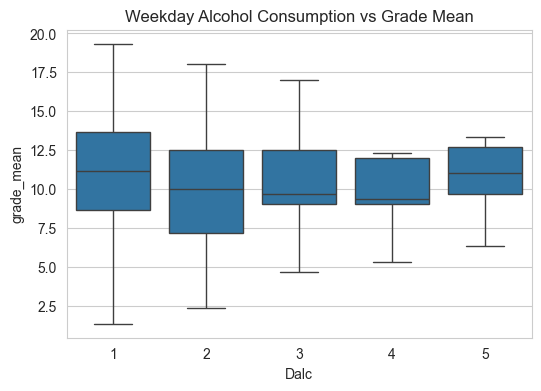

In [20]:
sns.boxplot(x='Dalc', y='grade_mean', data=df)
plt.title("Weekday Alcohol Consumption vs Grade Mean")

We can see that it barely influeces it

<Axes: xlabel='Walc', ylabel='grade_mean'>

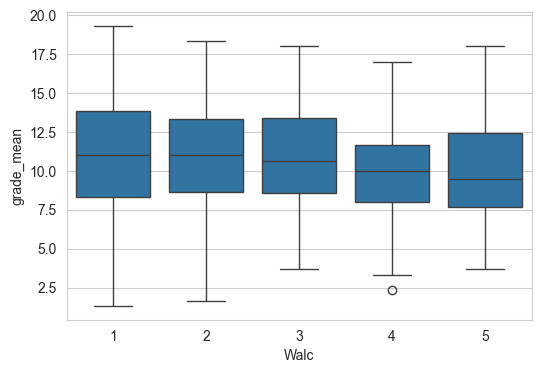

In [10]:
sns.boxplot(x='Walc', y='grade_mean', data=df)

its still a small difference but we can clearly see that if you drink during weekends you can still get good grades but heavy drinkers during weekdays dont fall in high grades though the average is almost the same

2. Do students with lower education parents do worse at school?

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.0,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.0,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.0,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.0,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.0,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


okay how about we mean the Medu and Fedu and then round it out and put it in a new column to compare it to the average grade

In [12]:
df['Pedu'] = ((df['Medu'] + df['Fedu']) / 2).round()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_mean,Pedu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,4.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,3.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,3.0


<Axes: xlabel='Pedu', ylabel='grade_mean'>

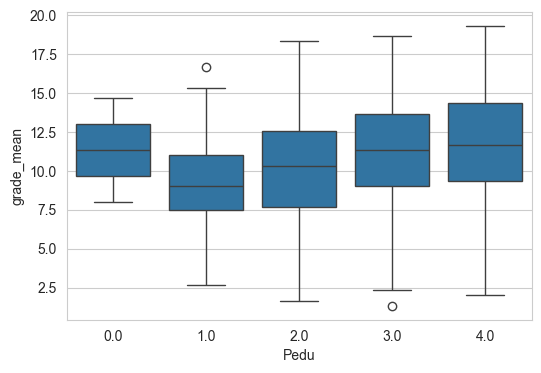

In [13]:
sns.boxplot(data=df, x='Pedu', y='grade_mean')

okay im guessing that the sample size of parents with education 0 is small thats why its high lets check


<Axes: xlabel='Pedu', ylabel='count'>

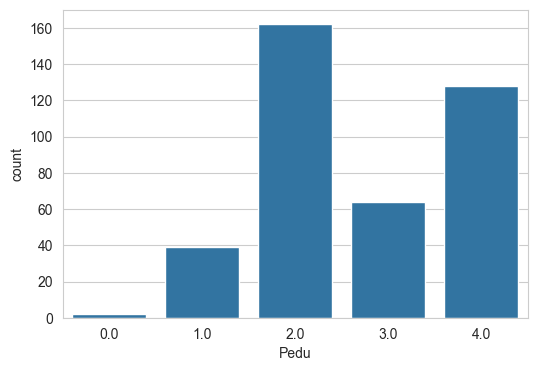

In [14]:
sns.countplot(data=df, x='Pedu' )

yeah thats what i thought there is barely anyone with parent_edu score 0

In [15]:
df[df['Pedu'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_mean,Pedu
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,2,1,1,5,2,7,8,9,8.000000,0.0
171,GP,M,16,U,GT3,T,1,0,other,other,...,2,1,1,3,2,13,15,16,14.666667,0.0


Here they are, and theres only two student with an average 0 parent education score, one has very good grades apparently scoring a 14 average so congrats to him

<Axes: xlabel='Pedu', ylabel='grade_mean'>

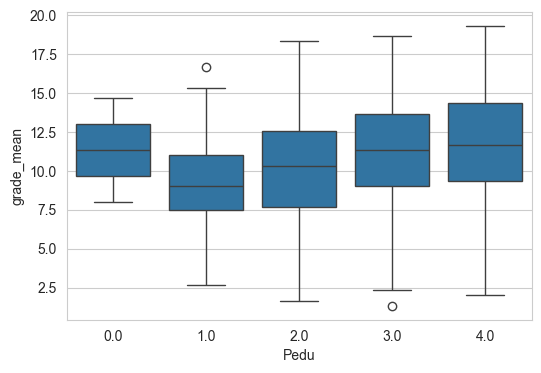

In [16]:
sns.boxplot(data=df, x='Pedu', y='grade_mean')

okay if we regard the Parents education at 0 we can see a clear trend of a student with higher parent education gas better gradess. Still good job for that student with 14 average grade

so we can conclude that having lower educated parents influences the students outcome

#### 3. Do students that have a romantic relationship do worse at school?

lets see the column 'romantic' (yes/no)

In [17]:
df['romantic']

0       no
1       no
2       no
3      yes
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: romantic, Length: 395, dtype: object

lets count it

<Axes: xlabel='romantic', ylabel='count'>

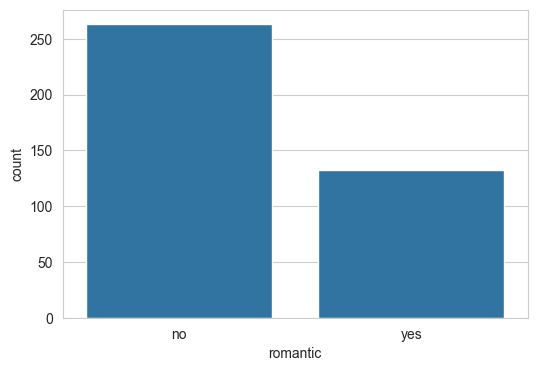

In [18]:
sns.countplot(data=df, x='romantic')

okay so the majority doesnt have a romantic relationship so lets be carefull in taking the mean to not get misleading results

<Axes: xlabel='romantic', ylabel='grade_mean'>

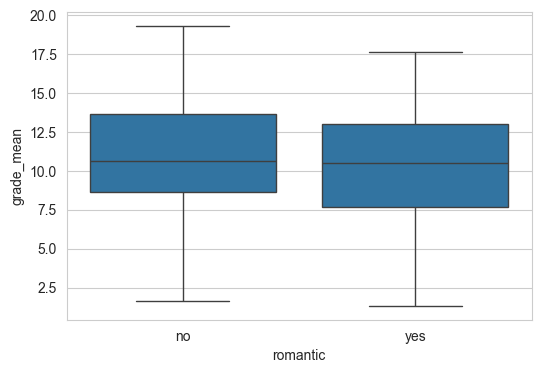

In [19]:
sns.boxplot(data=df, x='romantic', y='grade_mean')

we can only see a very small difference between having a romantic relastionship or not

4. Does student school absence equal worse grades?

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.0,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.0,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.0,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.0,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.0,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


absences go from (0-93) lets see what we can do

<Axes: xlabel='absences', ylabel='count'>

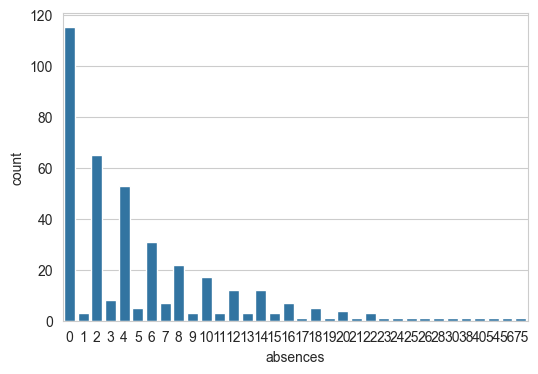

In [29]:
sns.countplot(data=df, x='absences')

theres a lot of students with 3 or less absences so if we'd use a histogram or a regplot it would give us bad results, lets group them

In [43]:
bins = [0,3,6,11, df['absences'].max()]
label = ['0-2', '3-5', '6-10', '11+']
df['absences_group'] = pd.cut(df['absences'], bins=bins, labels=label, include_lowest=True)

we can create a violin plot to visualise the results beautifully

Text(0.5, 1.0, 'Absences Group vs Grade Distribution')

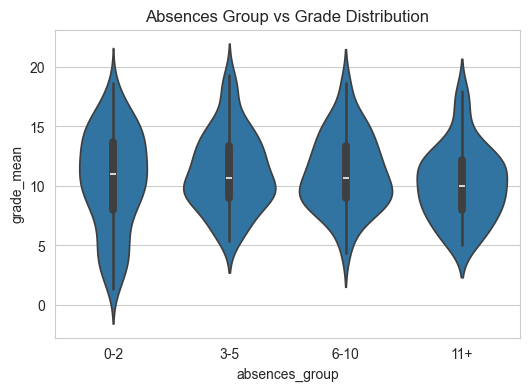

In [44]:
sns.violinplot(data=df, x='absences_group', y='grade_mean')
plt.title('Absences Group vs Grade Distribution')

okay we only see a slight difference between the grades and abcenses so abcenses is not the leading factor in affecting grades lets go to the next question